# Naive Bayes Classifier

Naive Bayes Classification is based on Bayes theorem with an asumption of independence among predictors.In simple term it assumes that the presence of a particular feature in a class unrrelated to the presence of any other class.

**Bayes theorem**

* Bayes theorem is away of finding a probability when we know certain other probabilities.
   
   P(y|X) = P(X|y)*P(y)/P(X)
   
   Here y is class variable and x represent the columns or features.

In [2]:
#In this notebook try to classify the email as spam or not spam..This is a Binary classification problem..

In [3]:
import numpy as np
import pandas as pd
import sklearn

In [4]:
docs = pd.read_table("SMSSpamCollection",header =None,names = ["Class","sms"])
docs.head(4)

,Class,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...


In [5]:
docs["Class"].value_counts()

ham     4825
spam     747
Name: Class, dtype: int64

In [6]:
docs["label"] =docs.Class.map({"ham":0,"spam":1}) 

In [7]:
docs.head(3)

,Class,sms,label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1


In [8]:
X = docs.sms
y = docs.label

In [9]:
print(X.shape,y.shape)

(5572,) (5572,)


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 2)

In [12]:
X_test.head(3)

5086    Omg if its not one thing its another. My cat h...
2120                I hope you know I'm still mad at you.
2318    Waqt se pehle or naseeb se zyada kisi ko kuch ...
Name: sms, dtype: object

In [13]:
print(X_train.shape)
print(X_test.shape)

(4179,)
(1393,)


In [15]:
#Vectorizing the sentence and removing the stop words

from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(stop_words = "english")

vec.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [16]:
vec.vocabulary_

{'ok': 4547,
 'gonna': 2957,
 'head': 3116,
 'usf': 6721,
 'like': 3803,
 'minutes': 4166,
 'shame': 5636,
 'maybe': 4074,
 'cld': 1709,
 'meet': 4097,
 'hrs': 3272,
 'tomo': 6474,
 'exhausted': 2521,
 'train': 6524,
 'morning': 4251,
 'wine': 6994,
 'pie': 4810,
 'sleep': 5785,
 'gentle': 2889,
 'princess': 5011,
 'make': 4008,
 'sweet': 6202,
 'love': 3916,
 'know': 3662,
 'people': 4753,
 'hit': 3184,
 'fuck': 2820,
 'yes': 7140,
 'dear': 2048,
 'tmorrow': 6446,
 'pls': 4858,
 'accomodate': 750,
 'said': 5458,
 'text': 6325,
 'time': 6419,
 'sms': 5829,
 'services': 5604,
 'inclusive': 3384,
 'credits': 1935,
 'gotto': 2980,
 'www': 7095,
 'comuk': 1818,
 'net': 4393,
 'login': 3871,
 '3qxj9': 450,
 'unsubscribe': 6683,
 'stop': 6048,
 'extra': 2550,
 'charge': 1617,
 'help': 3147,
 '08702840625': 79,
 '220cm2': 344,
 '9ae': 708,
 'teams': 6279,
 'waiting': 6848,
 'players': 4845,
 'alrite': 875,
 'sam': 5468,
 'nic': 4417,
 'just': 3587,
 'checkin': 1641,
 'ur': 6701,
 'number': 44

In [23]:
#transform the train and test dataset

X_train_transform = vec.transform(X_train)
X_test_transform = vec.transform(X_test)

In [19]:
print(type(X_train_transform))
print(X_train_transform)


<class 'scipy.sparse.csr.csr_matrix'>
  (0, 2957)	1
  (0, 3116)	1
  (0, 3803)	1
  (0, 4166)	1
  (0, 4547)	1
  (0, 6721)	1
  (1, 1709)	1
  (1, 3272)	1
  (1, 4074)	1
  (1, 4097)	1
  (1, 5636)	1
  (1, 6474)	1
  (2, 2521)	1
  (2, 4251)	1
  (2, 4810)	1
  (2, 5785)	1
  (2, 6524)	1
  (2, 6994)	1
  (3, 2889)	2
  (3, 3916)	1
  (3, 4008)	1
  (3, 5011)	1
  (3, 6202)	1
  (4, 2820)	1
  (4, 3184)	1
  :	:
  (4176, 1062)	1
  (4176, 1523)	1
  (4176, 2167)	1
  (4176, 2778)	2
  (4176, 4444)	2
  (4176, 4863)	1
  (4176, 4872)	1
  (4176, 5584)	1
  (4176, 6828)	1
  (4176, 6988)	1
  (4176, 7035)	1
  (4177, 2974)	1
  (4177, 3565)	1
  (4177, 4436)	1
  (4177, 6819)	1
  (4178, 367)	1
  (4178, 882)	1
  (4178, 2420)	1
  (4178, 3629)	1
  (4178, 4807)	2
  (4178, 5593)	1
  (4178, 6325)	1
  (4178, 6777)	1
  (4178, 6778)	2
  (4178, 7110)	1


In [26]:
from sklearn.naive_bayes import MultinomialNB,BernoulliNB

MNB = MultinomialNB()
MNB.fit(X_train_transform,y_train)

#predict class

MNB_pred_proba = MNB.predict_proba(X_test_transform)

In [34]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [27]:
MNB_pred = MNB.predict(X_test_transform)

In [28]:
MNB_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [29]:
accuracy_score(y_test,MNB_pred)

0.9791816223977028

In [35]:
confusion_matrix(y_test,MNB_pred)

array([[1192,   10],
       [  19,  172]], dtype=int64)

Text(6.0, 0.5, 'Predicted label')

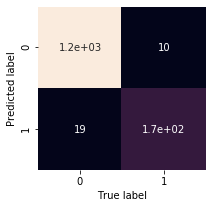

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

fig,ax = plt.subplots(figsize=(3,3))
ax = sns.heatmap(confusion_matrix(y_test,MNB_pred),
                 annot = True,
                 cbar = False)
plt.xlabel("True label")
plt.ylabel("Predicted label")

In [40]:
from sklearn.metrics import classification_report

print(classification_report(y_test,MNB_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1202
           1       0.95      0.90      0.92       191

    accuracy                           0.98      1393
   macro avg       0.96      0.95      0.96      1393
weighted avg       0.98      0.98      0.98      1393



In [41]:
from sklearn.metrics import roc_curve,roc_auc_score

y_pred_positive = MNB_pred_proba[:,1]

fpr,tpr,threshold = roc_curve(y_test,y_pred_positive)

In [42]:
print(roc_auc_score(y_test,y_pred_positive))

0.9793407148644058


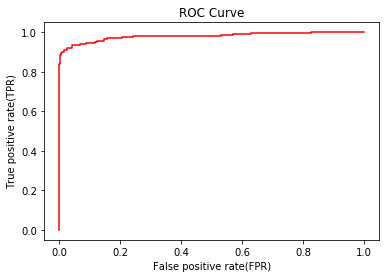

In [43]:
plt.plot(fpr,tpr,color = "red",label = "ROC")
plt.xlabel("False positive rate(FPR)")
plt.ylabel("True positive rate(TPR)")
plt.title("ROC Curve")
plt.show()